In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *
from ipywidgets import widgets
import cv2
from fastai import metrics

In [3]:
path = Path('../input/pnevmoniya')

In [4]:
path.ls()

(#3) [Path('../input/pnevmoniya/test'),Path('../input/pnevmoniya/train'),Path('../input/pnevmoniya/sample_solution.csv')]

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.408711,0.278012,0.937680,20:46


epoch,train_loss,valid_loss,accuracy,time
0,0.169811,0.140207,0.973154,27:07
1,0.064217,0.094323,0.980825,26:00


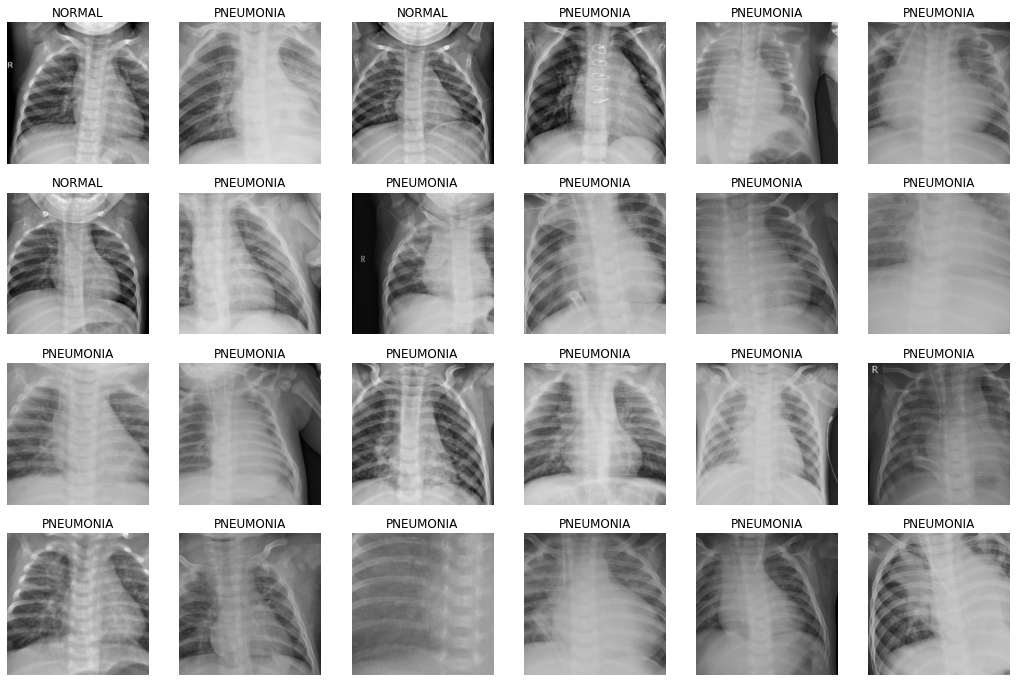

In [5]:
transport = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    item_tfms=Resize(224)
)
dls = transport.dataloaders(path/'train')
dls.train.show_batch(max_n=24,nrows=4)

learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(2)

In [6]:
interp = ClassificationInterpretation.from_learner(learn)

In [7]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [8]:
for i in range(0,624):
    label = df.iloc[i,0]
    img = cv2.imread('../input/pnevmoniya/test/'+label)
    pred, _, prob = learn.predict(img)
    df.iloc[i,1] = pred

In [9]:
mapping = {'PNEUMONIA': 1, 'NORMAL': 0}

df = df.replace({'labels': mapping})

In [10]:
df.to_csv('Pnevmoniya.csv',index=False)